In [1]:
import math  # Mathematical functions
import numpy as np  # Fundamental package for scientific computing with Python
import pandas as pd  # For analysing and manipulating data
from datetime import date, timedelta  # Date Functions
# Adds plotting functions for calender dates
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt  # For visualization
# import matplotlib.dates as mdates  # Formatting dates
# For measuring model performance / errors
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler  # to normalize the price data
# Deep learning library, used for neural networks
from keras.models import Sequential
# Deep learning classes for recurrent and regular densely-connected layers
from keras.layers import LSTM, Dense, Dropout
import yfinance as yf
import warnings




In [2]:
# start = '2010-01-01'
# end = '2019-12-31'
today = date.today()
end = today.strftime("%Y-%m-%d")
start = '2014-01-01'
# df = get_data("amzn", start,end)
df = yf.download("SBIN.NS", start, end)
print(df.shape)
df.head()

[*********************100%***********************]  1 of 1 completed
(2341, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-01,177.199997,177.490005,176.125000,176.505005,160.800247,5904780
2014-01-02,176.589996,180.600006,173.220001,174.259995,158.755035,19451900
2014-01-03,172.699997,173.600006,171.100006,171.964996,156.664230,13759590
2014-01-06,172.190002,172.399994,168.199997,168.815002,153.794510,13907830
2014-01-07,169.289993,170.199997,165.500000,166.139999,151.357513,17352910


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-22,566.349976,569.000000,561.049988,562.950012,562.950012,14979063
2023-06-23,562.000000,562.099976,553.799988,554.599976,554.599976,12215712
2023-06-26,556.000000,558.500000,554.500000,557.049988,557.049988,8360264
2023-06-27,558.250000,567.950012,555.650024,566.099976,566.099976,10694768
2023-06-30,574.000000,574.000000,570.200012,572.849976,572.849976,8711121


In [4]:
description = df.describe()
print(description)

              Open         High          Low        Close    Adj Close  \
count  2341.000000  2341.000000  2341.000000  2341.000000  2341.000000   
mean    319.144107   323.094357   314.659658   318.719538   305.097772   
std     115.648859   116.487520   114.622589   115.603865   115.755795   
min     147.000000   148.490005   145.509995   147.360001   134.248489   
25%     249.750000   252.600006   245.850006   248.949997   234.567749   
50%     283.850006   287.049988   279.100006   282.600006   268.350861   
75%     360.000000   364.000000   354.549988   359.399994   343.956116   
max     625.549988   629.549988   617.500000   625.500000   613.576660   

             Volume  
count  2.341000e+03  
mean   2.552368e+07  
std    2.166604e+07  
min    0.000000e+00  
25%    1.305290e+07  
50%    1.814756e+07  
75%    2.919358e+07  
max    2.626771e+08  


In [5]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-01,177.199997,177.490005,176.125000,176.505005,160.800247,5904780
1,2014-01-02,176.589996,180.600006,173.220001,174.259995,158.755035,19451900
2,2014-01-03,172.699997,173.600006,171.100006,171.964996,156.664230,13759590
3,2014-01-06,172.190002,172.399994,168.199997,168.815002,153.794510,13907830
4,2014-01-07,169.289993,170.199997,165.500000,166.139999,151.357513,17352910


In [6]:
df = df.drop(['Date', 'Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,177.199997,177.490005,176.125000,176.505005,5904780
1,176.589996,180.600006,173.220001,174.259995,19451900
2,172.699997,173.600006,171.100006,171.964996,13759590
3,172.190002,172.399994,168.199997,168.815002,13907830
4,169.289993,170.199997,165.500000,166.139999,17352910


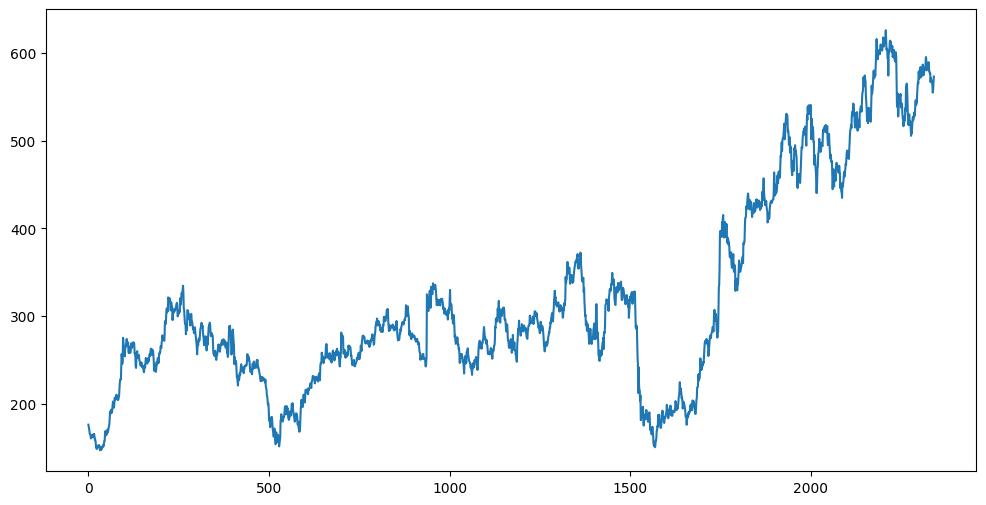

In [7]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)

In [8]:
df

,Open,High,Low,Close,Volume
0,177.199997,177.490005,176.125000,176.505005,5904780
1,176.589996,180.600006,173.220001,174.259995,19451900
2,172.699997,173.600006,171.100006,171.964996,13759590
3,172.190002,172.399994,168.199997,168.815002,13907830
4,169.289993,170.199997,165.500000,166.139999,17352910
...,...,...,...,...,...
2336,566.349976,569.000000,561.049988,562.950012,14979063
2337,562.000000,562.099976,553.799988,554.599976,12215712
2338,556.000000,558.500000,554.500000,557.049988,8360264
2339,558.250000,567.950012,555.650024,566.099976,10694768


In [9]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2336    552.641999
2337    552.500999
2338    552.671999
2339    552.950998
2340    553.144498
Name: Close, Length: 2341, dtype: float64

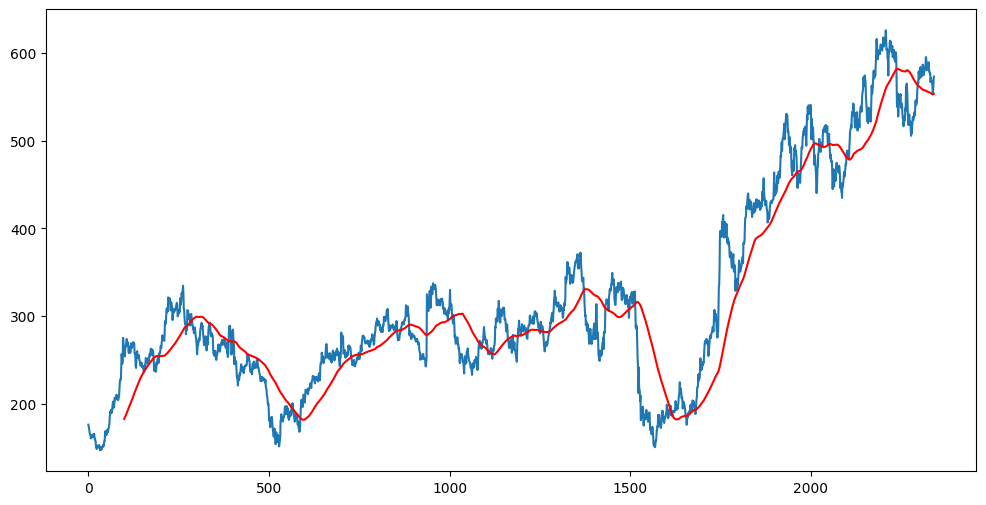

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [11]:
ma200 = df.Close.rolling(200).mean()
ma200


0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2336    566.85625
2337    566.94575
2338    567.03650
2339    567.17800
2340    567.37800
Name: Close, Length: 2341, dtype: float64

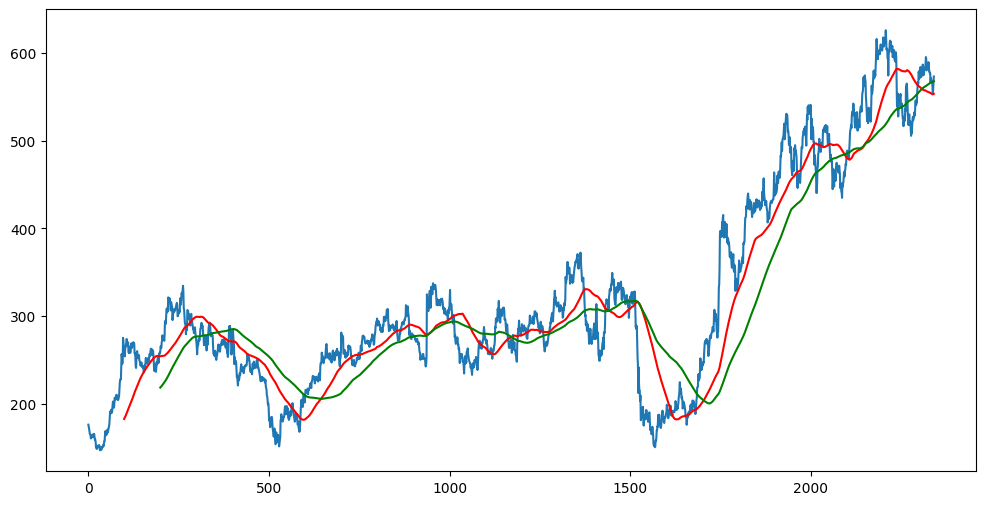

In [12]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [13]:
df.shape

(2341, 5)

In [14]:
# Splitting data into training set and testing set

data_training = pd.DataFrame(df['Close'][0 : int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70) : int(len(df))])

print(data_training.shape)
print(data_testing.shape)


(1638, 1)
(703, 1)


In [15]:
data_training.head()

,Close
0,176.505005
1,174.259995
2,171.964996
3,168.815002
4,166.139999


In [16]:
data_testing.head()

,Close
1638,212.000000
1639,218.100006
1640,216.250000
1641,213.149994
1642,206.600006


In [17]:
scaler = MinMaxScaler(feature_range=(0,1))
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.12951033],
       [0.11953428],
       [0.1093361 ],
       ...,
       [0.277684  ],
       [0.30345714],
       [0.34433882]])

In [18]:
data_training_array.shape

(1638, 1)

In [19]:
x_train = []
y_train = []

for i in range (100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100 : i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)



In [20]:
x_train.shape

(1538, 100, 1)

In [21]:
#  ML :- LSTM Model

model = Sequential()
model.add(LSTM(units= 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))  #Only one unit using that is close and it conects all above layers

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [23]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs= 100)

Epoch 1/100
49/49 [==============================] - 21s 262ms/step - loss: 0.0657
Epoch 2/100
49/49 [==============================] - 12s 247ms/step - loss: 0.0183
Epoch 3/100
49/49 [==============================] - 12s 250ms/step - loss: 0.0170
Epoch 4/100
49/49 [==============================] - 12s 247ms/step - loss: 0.0142
Epoch 5/100
49/49 [==============================] - 12s 247ms/step - loss: 0.0121
Epoch 6/100
49/49 [==============================] - 12s 248ms/step - loss: 0.0109
Epoch 7/100
49/49 [==============================] - 12s 249ms/step - loss: 0.0107
Epoch 8/100
49/49 [==============================] - 15s 315ms/step - loss: 0.0123
Epoch 9/100
49/49 [==============================] - 16s 315ms/step - loss: 0.0099
Epoch 10/100
49/49 [==============================] - 12s 238ms/step - loss: 0.0097
Epoch 11/100
49/49 [==============================] - 12s 237ms/step - loss: 0.0092
Epoch 12/100
49/49 [==============================] - 12s 243ms/step - loss: 0.0094
E

In [24]:
model.save('keras_model.h5')

In [25]:
data_testing.head()

,Close
1638,212.000000
1639,218.100006
1640,216.250000
1641,213.149994
1642,206.600006


In [26]:
data_training.tail(100)   #this are the values that append in data testing set

,Close
1538,186.399994
1539,183.000000
1540,187.750000
1541,183.500000
1542,182.350006
...,...
1633,201.449997
1634,207.949997
1635,209.850006
1636,215.649994


In [27]:
past_100_days = data_training.tail(100)

In [28]:
# final_df = past_100_days.append(data_testing, ignore_index=True)
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [29]:
final_df.head()  #Testing data

,Close
0,186.399994
1,183.000000
2,187.750000
3,183.500000
4,182.350006


In [30]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.07489727],
       [0.06773411],
       [0.07774148],
       [0.06878752],
       [0.06636469],
       [0.07932159],
       [0.08932897],
       [0.08774886],
       [0.07142104],
       [0.07974295],
       [0.07552932],
       [0.06088696],
       [0.06330978],
       [0.07047297],
       [0.08269251],
       [0.08353522],
       [0.05899084],
       [0.04118822],
       [0.04266302],
       [0.04192562],
       [0.03328766],
       [0.03075949],
       [0.03381436],
       [0.04898346],
       [0.03602653],
       [0.03276096],
       [0.00937532],
       [0.00410828],
       [0.00537235],
       [0.00231748],
       [0.        ],
       [0.00115872],
       [0.01632782],
       [0.01548508],
       [0.02201622],
       [0.04045085],
       [0.04087221],
       [0.05066889],
       [0.04887811],
       [0.07784683],
       [0.07574001],
       [0.07078898],
       [0.07763613],
       [0.05540922],
       [0.05962286],
       [0.04814072],
       [0.04645526],
       [0.046

In [31]:
input_data.shape

(803, 1)

In [32]:
x_test = []
y_test = []

for i in range (100, input_data.shape[0]):
    x_test.append(input_data[i-100 : i])
    y_test.append(input_data[i, 0])
    

In [33]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(703, 100, 1)
(703,)


In [34]:
# Making Prediction 
y_predicted = model.predict(x_test)
y_predicted.shape

22/22 [==============================] - 2s 67ms/step


(703, 1)

In [35]:
y_test

array([0.12883176, 0.14168335, 0.13778573, 0.13125458, 0.11745497,
       0.1201938 , 0.11208258, 0.09269989, 0.09965235, 0.10923837,
       0.10038975, 0.10386598, 0.0997577 , 0.09396396, 0.08795955,
       0.0736332 , 0.07447591, 0.06941957, 0.0537238 , 0.06604865,
       0.07668807, 0.07205309, 0.07279045, 0.08311387, 0.0798483 ,
       0.08585273, 0.08395658, 0.08564204, 0.09996839, 0.10081111,
       0.09449066, 0.10365532, 0.08848625, 0.09501736, 0.11197723,
       0.10997577, 0.11145053, 0.11050247, 0.10944906, 0.09659747,
       0.0922785 , 0.08342988, 0.07974295, 0.08090171, 0.09522806,
       0.11355735, 0.11829768, 0.14284207, 0.14400083, 0.14463288,
       0.17033602, 0.17560306, 0.16001264, 0.16559568, 0.16601704,
       0.18824395, 0.21310438, 0.18729589, 0.19361634, 0.18508373,
       0.19593385, 0.19414304, 0.19930473, 0.19677656, 0.20478247,
       0.20246496, 0.22216366, 0.23733276, 0.25018435, 0.25503   ,
       0.25176446, 0.25007897, 0.25618879, 0.25987571, 0.25239

In [36]:
y_predicted

array([[0.1334405 ],
       [0.13896218],
       [0.14402741],
       [0.14825091],
       [0.15114564],
       [0.15253563],
       [0.15251762],
       [0.15136558],
       [0.14934514],
       [0.14676544],
       [0.14393257],
       [0.14105812],
       [0.1383084 ],
       [0.13577886],
       [0.13349621],
       [0.13143921],
       [0.12952809],
       [0.12771514],
       [0.12599099],
       [0.12434936],
       [0.12281591],
       [0.12144794],
       [0.12027794],
       [0.11932743],
       [0.11863905],
       [0.11820732],
       [0.11806141],
       [0.11816409],
       [0.11845204],
       [0.11896458],
       [0.11977449],
       [0.12075667],
       [0.1218546 ],
       [0.12281466],
       [0.12352976],
       [0.12413798],
       [0.1247842 ],
       [0.12555738],
       [0.12644476],
       [0.12735191],
       [0.1280204 ],
       [0.12830535],
       [0.12818784],
       [0.1276972 ],
       [0.12690797],
       [0.12598419],
       [0.12518694],
       [0.124

In [37]:
# scaler.scale_
scaling_factors = scaler.scale_
scale_factor = 1 / scaling_factors[0]


In [38]:
# scale_factor = 1/0.0045286
scale_factor = 1 / scaling_factors[0]
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor


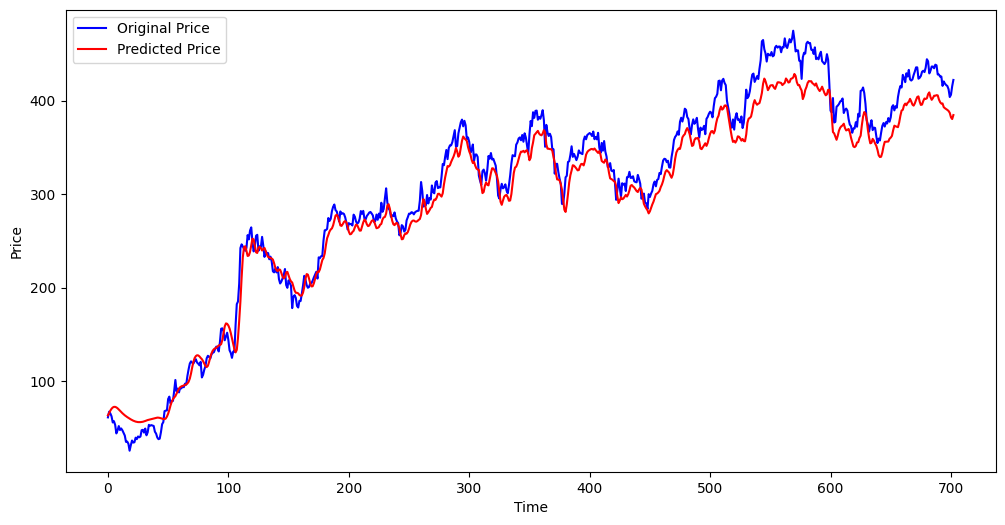

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [40]:
# Make forecasts for future time periods
future_periods = [15, 30, 45]  # Number of days to forecast
forecast_input = input_data[-365:]  # Take the last 365 data points as input

x_forecast = []

for i in range(future_periods[-1]):
    x_forecast.append(forecast_input[-365:])
    forecast = model.predict(np.array(x_forecast))
    forecast_input = np.concatenate((forecast_input, forecast[-1:]), axis=0)
    x_forecast.pop(0)

forecasts = forecast_input[-sum(future_periods):] * scale_factor

# Display the forecasts
for i, period in enumerate(future_periods):
    print(f"Forecast for {period} days: {forecasts[i][0]}")

1/1 [==============================] - 0s 97ms/step
Forecast for 15 days: 391.3999938964844
Forecast for 30 days: 389.2499694824219
Forecast for 45 days: 380.14999389648443
Forecast for 60 days: 374.30001831054693
